In [2]:
'''
1. 데이터 수집 및 정제
2. 그래프 분석(히스토그램, Bar, Trend 차트 등)
3. 기술통계 (요약 통계: 평균, 표준편차, 사분위  빈도분석: 빈도, 최빈값)
4. 추론통계 : 가설검정
5. 다변량 통계 : 상관/인과관계 분석 : 선형 회귀, 로지스틱 회귀
               비지도 분류 : 주성분, 군집분석
               -> 분류결과는 목표변수와 연계 분석
6. 기계학습 : 트리기반 -> 의사결정트리, 랜덤포레스트, 부스팅
            확률기반 -> KNN , Naive Bayesian, 신경망 등
7. 모델 평가
'''
#한글폰트
import matplotlib.font_manager as fm

#행렬처리 모듈
import numpy as np
#자료구조인 Series, DataFrame 등을 제공하는 모듈
import pandas as pd
#추세 그래프 및 통계용 차트를 제공하는 시각화 모듈
import seaborn as sns
#그래프 및 시각화 모듈
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
from sklearn import linear_model
from sklearn.preprocessing import scale, robust_scale, minmax_scale
#다중공선성 패키지 불러오기
from statsmodels.stats.outliers_influence import variance_inflation_factor
#sklearn 선형회귀 모형 -> 변수 선택법을 위함
from sklearn.linear_model import LinearRegression
#변수 선택법(후진제거법)log_model = sm.Logit.from_formula("""SCALE ~  PT_THK + PT_WDTH + PT_LTH + PT_WGT + C(FUR_NO) + FUR_HZ_TEMP + FUR_HZ_TIME + FUR_SZ_TEMP + FUR_SZ_TIME + FUR_TIME + FUR_EXTEMP + ROLLING_TEMP_T5 + C(HSB) + ROLLING_DESCALING+ C(WORK_GR) + 1""", ds_posco)

from sklearn.feature_selection import RFE
#sklearn.tree 의 DecisionTreeClassifier : 분류의사결정나무
from sklearn.tree import DecisionTreeClassifier
#random forest
from sklearn.ensemble import RandomForestClassifier
#GB
from sklearn.ensemble import GradientBoostingClassifier
#SVM
from sklearn.svm import SVC
#F1 Score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
#데이터 표준화 함수
from sklearn.preprocessing import StandardScaler

for f in fm.fontManager.ttflist:
    if 'NanumBarunGothic' in f.fname: plt.rcParams['font.family']='NanumBarunGothic'
    # 폰트 나눔고딕으로

print(plt.rcParams['font.family'])

matplotlib.rcParams['axes.unicode_minus'] = False # '-'기호 제대로 나오게

['NanumBarunGothic']


In [3]:
ds_posco = pd.read_csv("../../실습화일/SCALE불량.csv", encoding='euc-kr', engine='python')
ds_posco

PLATE_NO         ROLLING_DATE SCALE        SPEC STEEL_KIND  PT_THK  \
0    PB562774  2008-08-01:00:00:15    양품  AB/EH32-TM         T1   32.25   
1    PB562775  2008-08-01:00:00:16    양품  AB/EH32-TM         T1   32.25   
2    PB562776  2008-08-01:00:00:59    양품   NV-E36-TM         T8   33.27   
3    PB562777  2008-08-01:00:01:24    양품   NV-E36-TM         T8   33.27   
4    PB562778  2008-08-01:00:01:44    양품  BV-EH36-TM         T8   38.33   
5    PB562779  2008-08-01:00:02:06    양품  BV-EH36-TM         T8   38.33   
6    PB562780  2008-08-01:00:02:28    양품  BV-EH36-TM         T8   38.33   
7    PB562781  2008-08-01:00:02:21    양품  BV-EH36-TM         T8   38.33   
8    PB562782  2008-08-01:00:02:51    양품  BV-EH36-TM         T8   38.33   
9    PB562783  2008-08-01:00:03:15    양품      COMMON         T8   38.43   
10   PB562784  2008-08-01:00:03:24    양품      COMMON         T8   38.43   
11   PB562785  2008-08-01:00:04:15    불량      COMMON         T8   38.43   
12   PB562786  2008-08-01:00:04:20    양품      COMMON         T8   38.43   
13   PB562787  2008-08-01:00:05:47    양품      COMMON         T0   30.23   
14   PB562788  2008-08-01:00:05:25    양품   GL-E32-TM         T1   34.28   
15   PB562789  2008-08-01:00:05:16    불량   GL-E32-TM         T1   50.46   
16   PB562790  2008-08-01:01:10:14    양품   GL-E32-TM         T1   50.46   
17   PB562791  2008-08-01:01:10:14    양품   GL-E32-TM         T1   50.46   
18   PB562792  2008-08-01:01:10:44    양품   GL-E32-TM         T1   50.46   
19   PB562793  2008-08-01:01:11:01    양품   GL-E32-TM         T1   50.46   
20   PB562794  2008-08-01:01:11:08    양품  BV-EH36-TM         T8   50.46   
21   PB562795  2008-08-01:01:12:45    양품   GL-E36-TM         T8   44.39   
22   PB562796  2008-08-01:01:12:49    양품   GL-E36-TM         T8   44.39   
23   PB562797  2008-08-01:01:13:47    양품   GL-E36-TM         T8   48.44   
24   PB562798  2008-08-01:01:13:05    양품   GL-E36-TM         T8   48.44   
25   PB562799  2008-08-01:01:14:20    양품   GL-E36-TM         T8   48.44   
26   PB562800  2008-08-01:01:14:53    양품      COMMON         T1   45.40   
27   PB562801  2008-08-01:01:14:25    양품      COMMON         T1   45.40   
28   PB562802  2008-08-01:01:15:39    양품      COMMON         T1   45.40   
29   PB562803  2008-08-01:01:15:14    양품      COMMON         T1   45.40   
..        ...                  ...   ...         ...        ...     ...   
690  PB563477  2008-08-02:12:24:54    양품     NK-KA32         C0   13.06   
691  PB563478  2008-08-02:12:24:12    양품        LR-A         C0   13.06   
692  PB563479  2008-08-02:12:25:26    양품      NV-A32         C0   13.06   
693  PB563480  2008-08-02:12:25:51    양품     NK-KA32         C0   13.06   
694  PB563481  2008-08-02:12:25:42    양품     NK-KA32         C0   13.06   
695  PB563482  2008-08-02:12:25:02    양품     NK-KA32         C0   13.06   
696  PB563483  2008-08-02:13:30:39    양품      GL-A32         C0   12.05   
697  PB563484  2008-08-02:13:30:47    양품     LR-AH32         C0   12.05   
698  PB563485  2008-08-02:13:30:03    양품      NV-A32         C0   12.05   
699  PB563486  2008-08-02:13:31:39    양품     LR-AH32         C0   12.05   
700  PB563487  2008-08-02:13:31:03    불량     LR-AH32         C0   12.05   
701  PB563488  2008-08-02:13:31:36    양품      GL-A32         C0   12.05   
702  PB563489  2008-08-02:13:31:03    양품     LR-AH32         C0   12.05   
703  PB563490  2008-08-02:13:33:09    양품     LR-AH32         C0   12.05   
704  PB563491  2008-08-02:13:33:44    양품     LR-AH32         C0   12.05   
705  PB563492  2008-08-02:13:32:27    양품     LR-AH32         C0   12.05   
706  PB563493  2008-08-02:13:32:00    양품      NV-A32         C0   12.56   
707  PB563494  2008-08-02:13:33:26    양품      NV-A32         C0   12.05   
708  PB563495  2008-08-02:13:33:52    양품      NV-A32         C0   12.05   
709  PB563496  2008-08-02:13:34:15    양품     LR-AH32         C0   12.05   
710  PB563497  2008-08-02:13:34:44    양품     LR-AH32         C0   12.05   
711  PB563498  2008-08-02:13:3

In [4]:
#결측치 확인
#확인결과 결측치, 이상치 없음
ds_posco.isnull().sum(axis = 0)

PLATE_NO             0
ROLLING_DATE         0
SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THK               0
PT_WDTH              0
PT_LTH               0
PT_WGT               0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

In [5]:
#1-2. 데이터 역할 지정
#목표변수, 설명변수 역할 지정
#설명변수가 아닌것들 x데이터에서 제외
ds_posco_y = ds_posco["SCALE"]
# ds_posco_x = ds_posco.drop("PLATE_NO", axis = 1, inplace = False)
ds_posco_x = ds_posco.drop({"SCALE","ROLLING_DATE","PLATE_NO"}, axis = 1, inplace = False)
# ds_posco_x = ds_posco.drop("SCALE", axis = 1, inplace = False)
print("목표변수 데이터크기: {}".format(ds_posco_y.shape))
print("설명변수 데이터크기: {}".format(ds_posco_x.shape))



목표변수 데이터크기: (720,)
설명변수 데이터크기: (720, 18)


In [6]:
def fun_print_crosstab(data, var):
    print(pd.crosstab(index = data["SCALE"], columns = data[var]))
    print()
    print(pd.crosstab(index = data["SCALE"], columns = data[var], normalize = "columns").round(3))

### 설명변수, 목적변수에 대한 탐색적 분석이다. 각 그래프를 분석하고 특징이 있는지 확인한다

In [7]:
#스펙
fun_print_crosstab(ds_posco, "SPEC")

SPEC   A131-DH36TM  A283-C  A516-60  A709-36  AB/A  AB/AH32  AB/B  AB/EH32-TM  \
SCALE                                                                           
불량               1       5        1        0     4        1     3           0   
양품               0       1        1        1     3        4     3           2   

SPEC   AB/EH36-TM  API-2W-50T   ...     NV-A32-TM  NV-A36-TM  NV-B  NV-D32-TM  \
SCALE                           ...                                             
불량              1           0   ...             1          0     2          0   
양품             16           2   ...             2          2     1          4   

SPEC   NV-D36-TM  NV-E32-TM  NV-E36-TM  PILAC-BT33  SA283-C  V42JBN3  
SCALE                                                                 
불량             1          0          0           2       10        1  
양품             4          2          5          38       11        3  

[2 rows x 66 columns]

SPEC   A131-DH36TM  A283-C  A516-60  A709-

In [8]:
#강종
fun_print_crosstab(ds_posco, "STEEL_KIND")

STEEL_KIND   C0  C1  C3  T0  T1  T3  T5  T7  T8
SCALE                                          
불량          212   1   1   2   2   0   2   6   5
양품          291   0   6  14  16   2  41  29  90

STEEL_KIND     C0   C1     C3     T0     T1   T3     T5     T7     T8
SCALE                                                                
불량          0.421  1.0  0.143  0.125  0.111  0.0  0.047  0.171  0.053
양품          0.579  0.0  0.857  0.875  0.889  1.0  0.953  0.829  0.947


In [9]:
#가열로 호기
fun_print_crosstab(ds_posco, "FUR_NO")

FUR_NO  1호기  2호기  3호기
SCALE                
불량       73   70   88
양품      167  167  155

FUR_NO    1호기    2호기    3호기
SCALE                      
불량      0.304  0.295  0.362
양품      0.696  0.705  0.638


In [10]:
#HSB적용(1-적용,0-미적용)
fun_print_crosstab(ds_posco, "HSB")

HSB    미적용   적용
SCALE          
불량      33  198
양품       0  489

HSB    미적용     적용
SCALE            
불량     1.0  0.288
양품     0.0  0.712


In [11]:
#작업조
fun_print_crosstab(ds_posco, "WORK_GR")

WORK_GR   1조   2조   3조   4조
SCALE                      
불량        67   45   54   65
양품       122  120  118  129

WORK_GR     1조     2조     3조     4조
SCALE                              
불량       0.354  0.273  0.314  0.335
양품       0.646  0.727  0.686  0.665


### 범주형 데이터의 경우 위와 같이 각 범주마다 목적변수와 연관지어서 데이터를 확인하였다.
### SPEC의 경우 모델이 다양하고  특정모델에 치우친 것을 확인할 수 있으며
### 가열로 호기의 경우 1,2,3기 모두 0.3의 불량대로 골고루 퍼진 것을 확인할 수 있다
### HSB의 경우 미적용한것은 모두 불량인것을 확인하였다.
### 작업조의 경우 1,2,3,4조가 모두 골고루 불량일 확률이 비슷한것으로 확인되었다.
### 따라서 범주형데이터에선 특이하게 벗어난 이상치나 관련없어보이는 설명변수를 찾지못하였다.

Text(0.5, 69.00000000000009, 'Plate 뚜께')

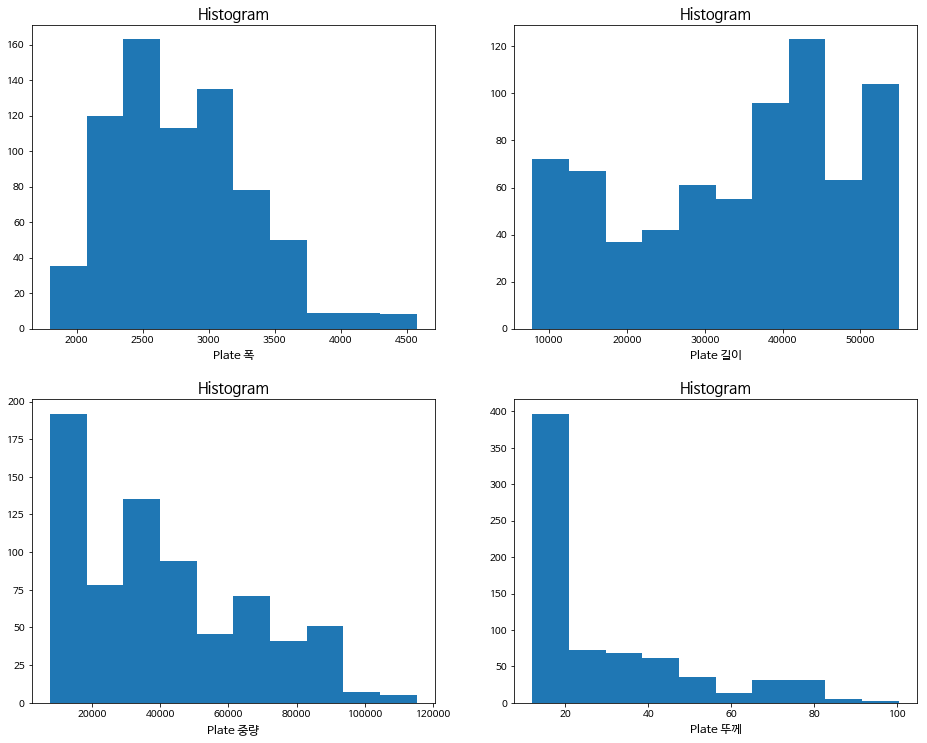

In [12]:
fig, axes = plt.subplots(nrows=2, ncols = 2, figsize = (13, 10)) #(2,2) 4분할, 4개의 그래프 생성
plt.tight_layout(w_pad=5, h_pad=5) #w_pad:열 사이 간격, h_pad: 행 사이 간격
#Histogram
axes[0,0].hist(ds_posco["PT_WDTH"]) #[0,0]위치에 histogram 생성
axes[0,0].set_title("Histogram", fontsize = 15) #제목 설정, 글자 크기 15
axes[0,0].set_xlabel("Plate 폭",fontsize = 12) #x축 label 지정
#
axes[0,1].hist(ds_posco["PT_LTH"]) #[0,0]위치에 histogram 생성
axes[0,1].set_title("Histogram", fontsize = 15) #제목 설정, 글자 크기 15
axes[0,1].set_xlabel("Plate 길이",fontsize = 12) #x축 label 지정
#
axes[1,0].hist(ds_posco["PT_WGT"]) #[0,0]위치에 histogram 생성
axes[1,0].set_title("Histogram", fontsize = 15) #제목 설정, 글자 크기 15
axes[1,0].set_xlabel("Plate 중량",fontsize = 12) #x축 label 지정
#
axes[1,1].hist(ds_posco["PT_THK"]) #[0,0]위치에 histogram 생성
axes[1,1].set_title("Histogram", fontsize = 15) #제목 설정, 글자 크기 15
axes[1,1].set_xlabel("Plate 뚜께",fontsize = 12) #x축 label 지정

#### plate의 폭의 경우 정규성 분포를 띄는것을 확인했으며 plate 두께의 경우는 대부분 20 밑에 분포하는 것을 확인하였다

Text(0.5, 69.00000000000009, '가열로 균열대 온도')

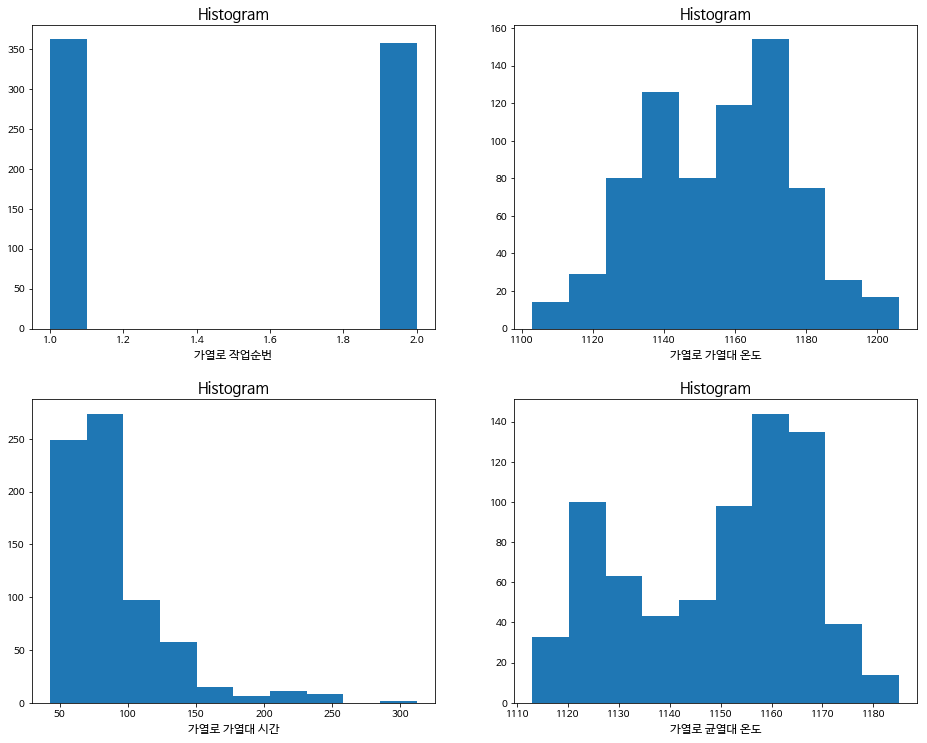

In [13]:
fig, axes = plt.subplots(nrows=2, ncols = 2, figsize = (13, 10)) #(2,2) 4분할, 4개의 그래프 생성
plt.tight_layout(w_pad=5, h_pad=5) #w_pad:열 사이 간격, h_pad: 행 사이 간격
#Histogram
axes[0,0].hist(ds_posco["FUR_NO_ROW"]) #[0,0]위치에 histogram 생성
axes[0,0].set_title("Histogram", fontsize = 15) #제목 설정, 글자 크기 15
axes[0,0].set_xlabel("가열로 작업순번",fontsize = 12) #x축 label 지정
#Pie Chart
axes[0,1].hist(ds_posco["FUR_HZ_TEMP"]) #[0,0]위치에 histogram 생성
axes[0,1].set_title("Histogram", fontsize = 15) #제목 설정, 글자 크기 15
axes[0,1].set_xlabel("가열로 가열대 온도",fontsize = 12) #x축 label 지정
#Trend
axes[1,0].hist(ds_posco["FUR_HZ_TIME"]) #[0,0]위치에 histogram 생성
axes[1,0].set_title("Histogram", fontsize = 15) #제목 설정, 글자 크기 15
axes[1,0].set_xlabel("가열로 가열대 시간",fontsize = 12) #x축 label 지정
#Scatter
axes[1,1].hist(ds_posco["FUR_SZ_TEMP"]) #[0,0]위치에 histogram 생성
axes[1,1].set_title("Histogram", fontsize = 15) #제목 설정, 글자 크기 15
axes[1,1].set_xlabel("가열로 균열대 온도",fontsize = 12) #x축 label 지정

#### 가열로 작업순번의 경우 1, 2만 존재하여 모두 동일한 분포를 띄는것을 확인하였다 따라서 크게 영향을 미치지 않을거라 생각하였다.

Text(0.5, 69.00000000000009, '가열대 온도')

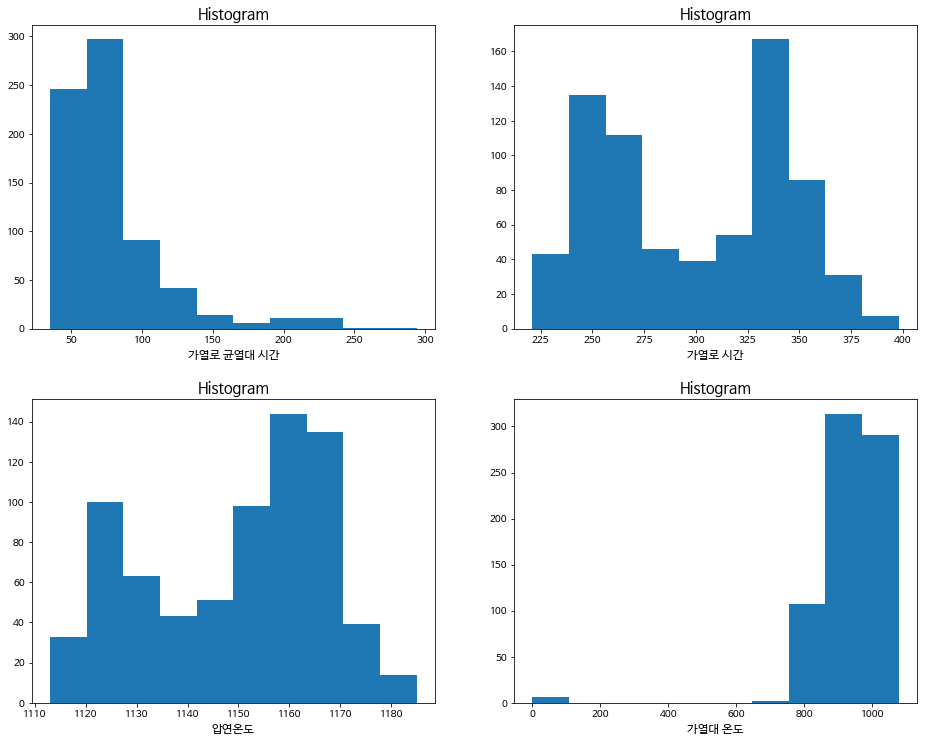

In [14]:
fig, axes = plt.subplots(nrows=2, ncols = 2, figsize = (13, 10)) #(2,2) 4분할, 4개의 그래프 생성
plt.tight_layout(w_pad=5, h_pad=5) #w_pad:열 사이 간격, h_pad: 행 사이 간격
#Histogram
axes[0,0].hist(ds_posco["FUR_SZ_TIME"]) #[0,0]위치에 histogram 생성
axes[0,0].set_title("Histogram", fontsize = 15) #제목 설정, 글자 크기 15
axes[0,0].set_xlabel("가열로 균열대 시간",fontsize = 12) #x축 label 지정
#Pie Chart
axes[0,1].hist(ds_posco["FUR_TIME"]) #[0,0]위치에 histogram 생성
axes[0,1].set_title("Histogram", fontsize = 15) #제목 설정, 글자 크기 15
axes[0,1].set_xlabel("가열로 시간",fontsize = 12) #x축 label 지정
#Trend
axes[1,0].hist(ds_posco["FUR_EXTEMP"]) #[0,0]위치에 histogram 생성
axes[1,0].set_title("Histogram", fontsize = 15) #제목 설정, 글자 크기 15
axes[1,0].set_xlabel("압연온도",fontsize = 12) #x축 label 지정
#Scatter
axes[1,1].hist(ds_posco["ROLLING_TEMP_T5"]) #[0,0]위치에 histogram 생성
axes[1,1].set_title("Histogram", fontsize = 15) #제목 설정, 글자 크기 15
axes[1,1].set_xlabel("가열대 온도",fontsize = 12) #x축 label 지정

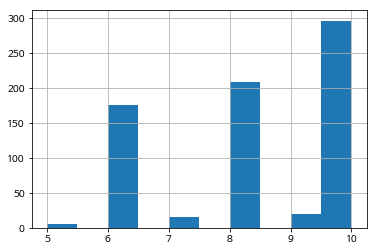

In [15]:
#탐색적분석 비소매업 비율
ds_posco["ROLLING_DESCALING"].hist()

In [16]:
ds_posco["SCALE"].replace(to_replace="불량", value=1, inplace = True)
ds_posco["SCALE"].replace(to_replace="양품", value=0, inplace = True)
#train 데이터셋 스케일 조정
# ds_posco_x_scaled = scale(ds_posco_x, axis = 0)
#스케일이 변경된 X변수 확인
# pd.DataFrame(ds_posco_x_scaled, columns = ds_posco_x.columns).head()


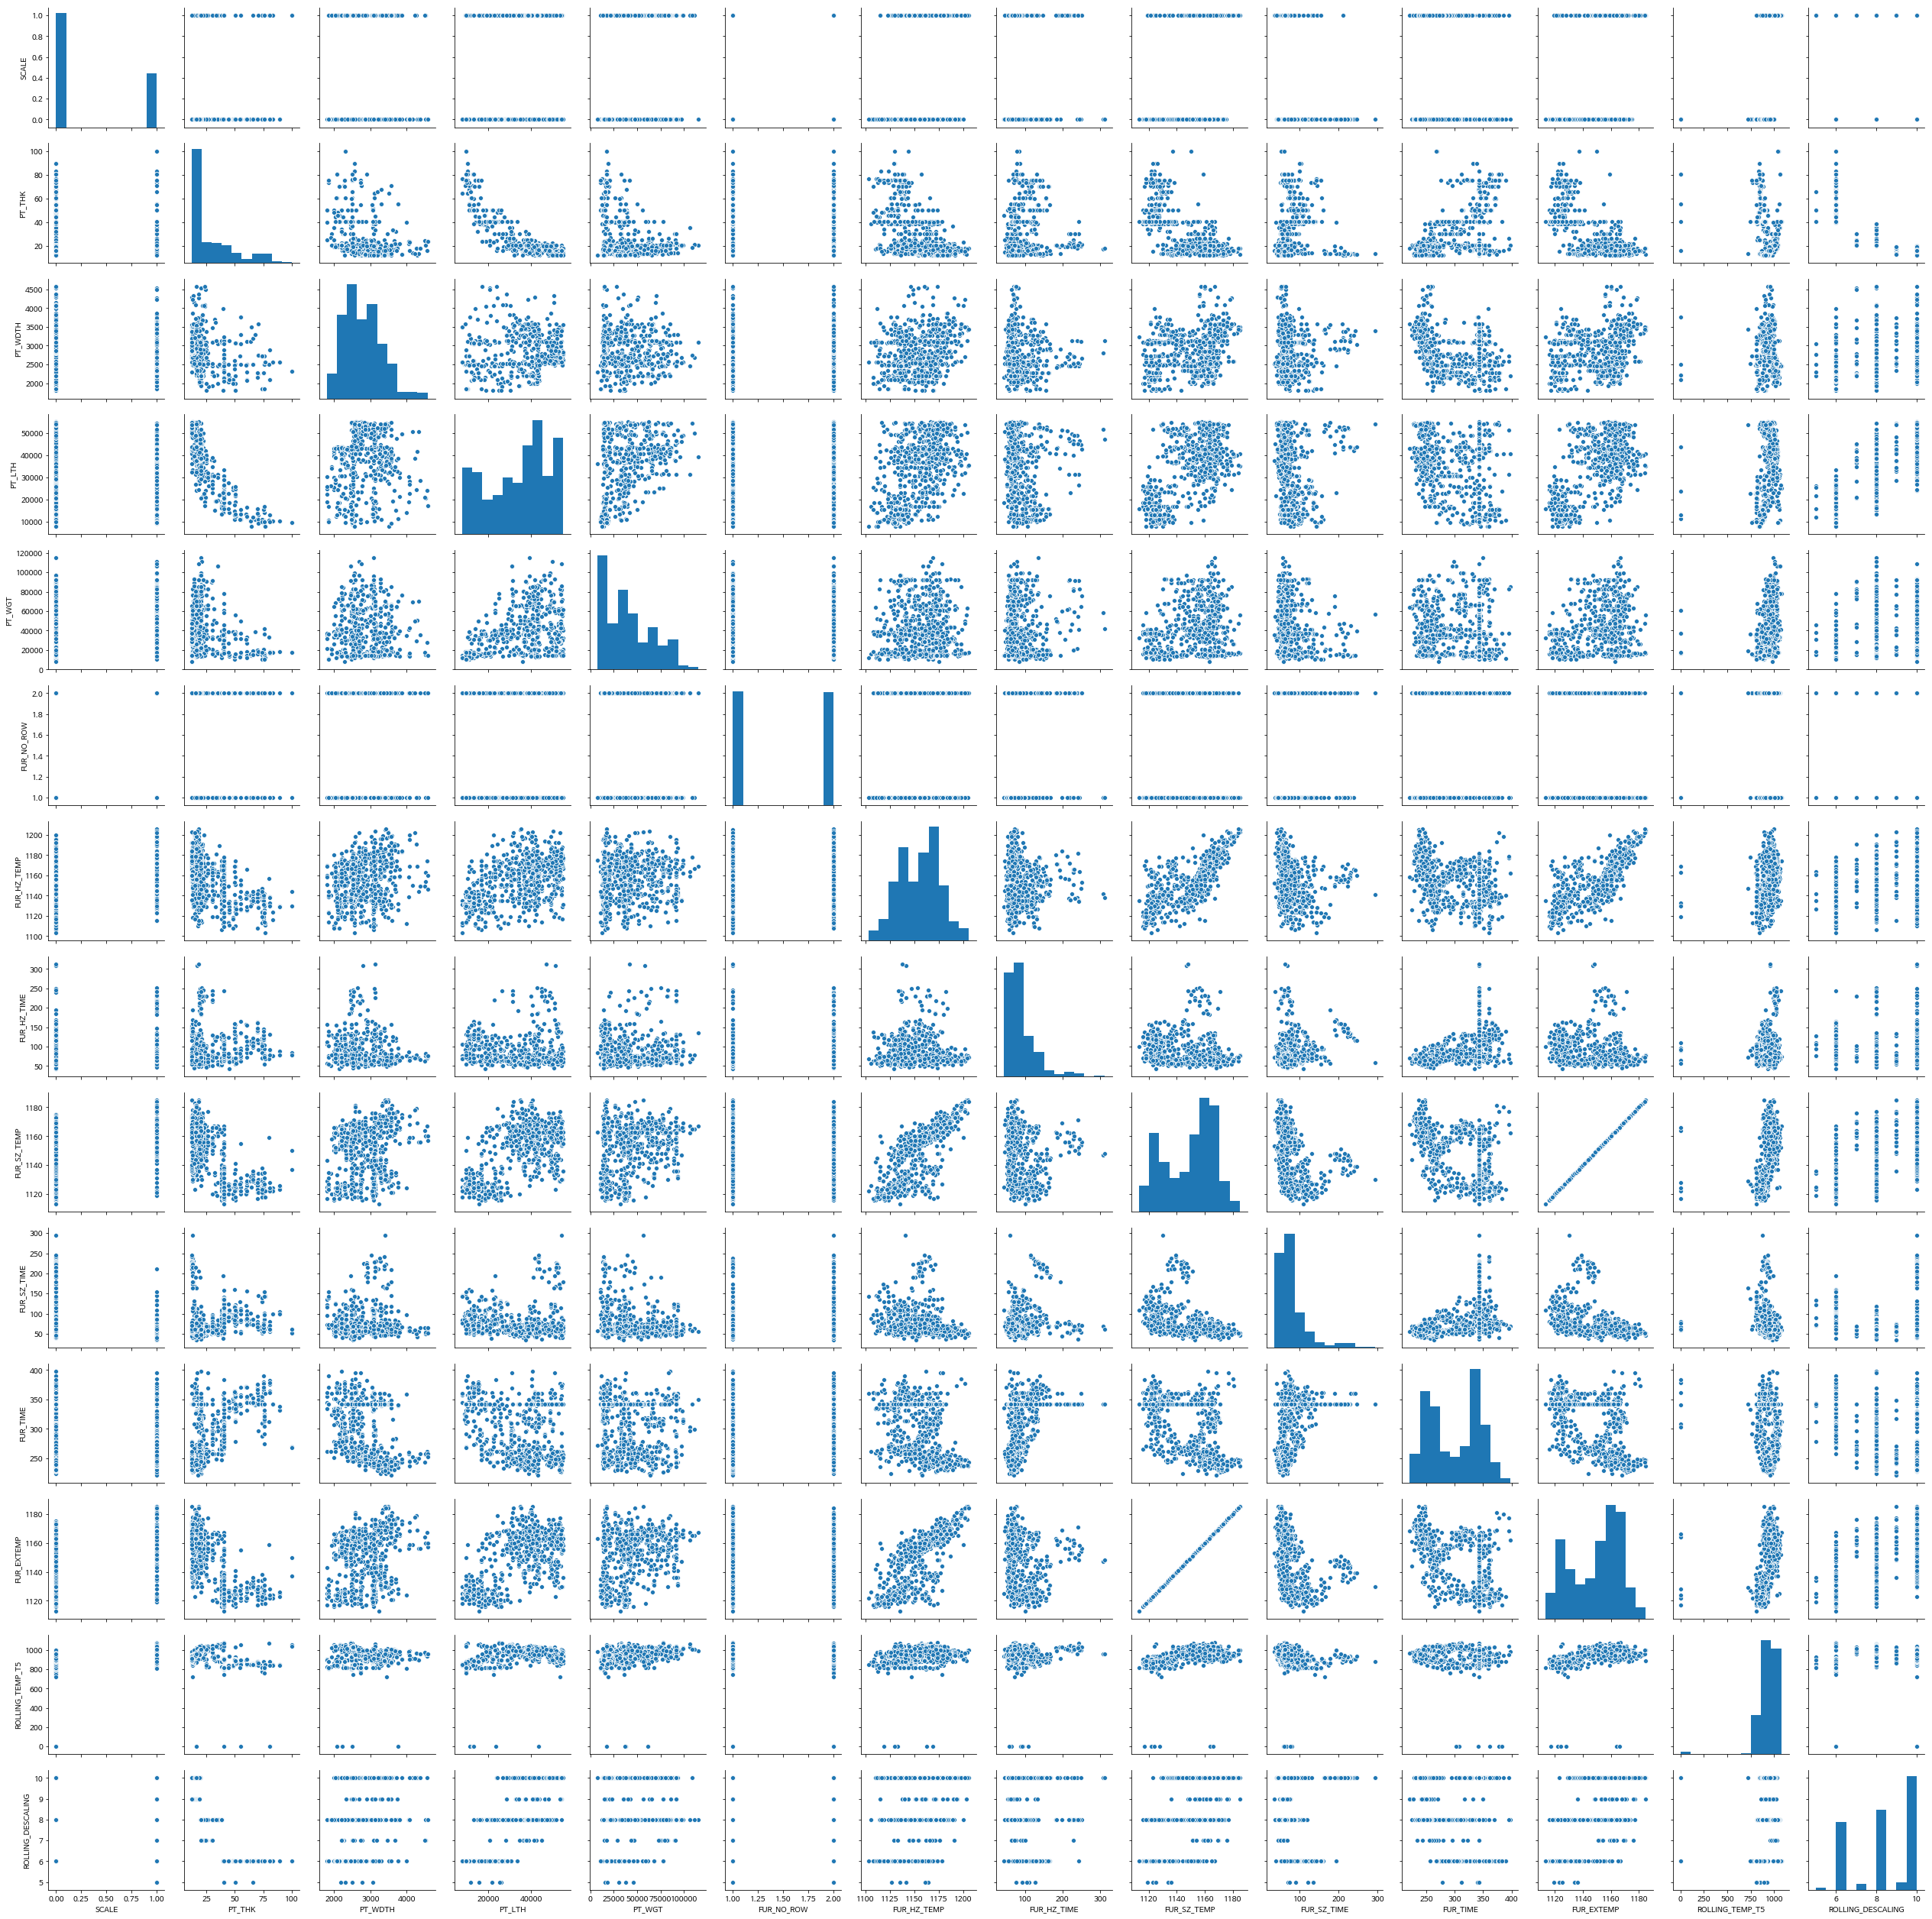

In [17]:
#2.변수 간의 경향성 파악 - 그래프 분석
sns.pairplot(ds_posco)

In [18]:
#2-2 변수 간의 경향성 파악 - 상관관계 분석
#상관관계 분석
ds_posco.corr().round(3)

SCALE  PT_THK  PT_WDTH  PT_LTH  PT_WGT  FUR_NO_ROW  \
SCALE              1.000  -0.125   -0.206   0.100   0.219      -0.023   
PT_THK            -0.125   1.000   -0.313  -0.863  -0.397      -0.003   
PT_WDTH           -0.206  -0.313    1.000   0.120   0.031       0.007   
PT_LTH             0.100  -0.863    0.120   1.000   0.452      -0.021   
PT_WGT             0.219  -0.397    0.031   0.452   1.000      -0.022   
FUR_NO_ROW        -0.023  -0.003    0.007  -0.021  -0.022       1.000   
FUR_HZ_TEMP        0.248  -0.524    0.180   0.473   0.153       0.005   
FUR_HZ_TIME        0.056   0.160   -0.119  -0.077   0.010      -0.016   
FUR_SZ_TEMP        0.375  -0.695    0.227   0.645   0.360       0.009   
FUR_SZ_TIME       -0.240   0.113    0.023  -0.070  -0.191       0.049   
FUR_TIME          -0.049   0.413   -0.393  -0.252  -0.058       0.016   
FUR_EXTEMP         0.375  -0.695    0.227   0.645   0.360       0.009   
ROLLING_TEMP_T5    0.385  -0.374   -0.022   0.313   0.263      -0.004   
ROLLING_DESCALING -0.007  -0.837    0.338   0.809   0.239       0.018   

                   FUR_HZ_TEMP  FUR_HZ_TIME  FUR_SZ_TEMP  FUR_SZ_TIME  \
SCALE                    0.248        0.056        0.375       -0.240   
PT_THK                  -0.524        0.160       -0.695        0.113   
PT_WDTH                  0.180       -0.119        0.227        0.023   
PT_LTH                   0.473       -0.077        0.645       -0.070   
PT_WGT                   0.153        0.010        0.360       -0.191   
FUR_NO_ROW               0.005       -0.016        0.009        0.049   
FUR_HZ_TEMP              1.000       -0.114        0.773       -0.222   
FUR_HZ_TIME             -0.114        1.000       -0.203        0.178   
FUR_SZ_TEMP              0.773       -0.203        1.000       -0.451   
FUR_SZ_TIME             -0.222        0.178       -0.451        1.000   
FUR_TIME                -0.348        0.473       -0.477        0.443   
FUR_EXTEMP               0.773       -0.203        1.000       -0.451   
ROLLING_TEMP_T5          0.265        0.012        0.452       -0.207   
ROLLING_DESCALING        0.471       -0.138        0.649       -0.106   

                   FUR_TIME  FUR_EXTEMP  ROLLING_TEMP_T5  ROLLING_DESCALING  
SCALE                -0.049       0.375            0.385             -0.007  
PT_THK                0.413      -0.695           -0.374             -0.837  
PT_WDTH              -0.393       0.227           -0.022              0.338  
PT_LTH               -0.252       0.645            0.313              0.809  
PT_WGT               -0.058       0.360            0.263              0.239  
FUR_NO_ROW            0.016       0.009           -0.004              0.018  
FUR_HZ_TEMP          -0.348       0.773            0.265              0.471  
FUR_HZ_TIME           0.473      -0.203            0.012             -0.138  
FUR_SZ_TEMP          -0.477       1.000            0.452              0.649  
FUR_SZ_TIME           0.443      -0.451           -0.207             -0.106  
FUR_TIME              1.000      -0.477           -0.199             -0.367  
FUR_EXTEMP           -0.477       1.000            0.452              0.649  
ROLLING_TEMP_T5      -0.199       0.452            1.000              0.268  
ROLLING_DESCALING    -0.367       0.649            0.268              1.000

In [19]:
#from_formula 함수를 이용하여 변수 역할 지정
#C(SPEC) + C(STEEL_KIND)
# log_model = sm.Logit.from_formula("""SCALE ~  C(SPEC) + C(STEEL_KIND) + PT_THK + PT_WDTH + PT_LTH + PT_WGT + C(FUR_NO) + FUR_HZ_TEMP + FUR_HZ_TIME + FUR_SZ_TEMP + FUR_SZ_TIME + FUR_TIME + FUR_EXTEMP + ROLLING_TEMP_T5 + C(HSB) + ROLLING_DESCALING+ C(WORK_GR) + 1""", ds_posco)
log_model = sm.Logit.from_formula("""SCALE ~  PT_THK + PT_WDTH + PT_LTH + PT_WGT + C(FUR_NO) + FUR_HZ_TEMP + FUR_HZ_TIME + FUR_SZ_TEMP + FUR_SZ_TIME + FUR_TIME + FUR_EXTEMP + ROLLING_TEMP_T5 + C(HSB) + ROLLING_DESCALING+ C(WORK_GR) + 1""", ds_posco)
log_result = log_model.fit()
#결과 출력
print(log_result.summary())


         Current function value: 0.268139
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  720
Model:                          Logit   Df Residuals:                      702
Method:                           MLE   Df Model:                           17
Date:                Fri, 15 Feb 2019   Pseudo R-squ.:                  0.5727
Time:                        09:39:16   Log-Likelihood:                -193.06
converged:                      False   LL-Null:                       -451.80
                                        LLR p-value:                 3.926e-99
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -89.2123   8232.257     -0.011      0.991   -1.62e+04     1.6e+04
C(FUR_NO)[T.2호기]     -0.2384      0.334     

/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


### Logistic 회귀계수 검정 -> 유의수준 P>|z| 0.05보다 작은 유의한 변수들은
### C(WORK-GR)[T.2조], C(WORK-GR)[T.3조], PT_WDTH, PT_LTH, FUR_HZ_TEMP, FUR_HZ_TIME, ROLLING_TEMP_T5, FUR_SZ_TIME, ROLLING_DESCALING

In [ ]:
#get_dummies : 데이터의 문자형 컬럼에 대한 더미변수 생성
ds_posco_dummy = pd.get_dummies(ds_posco)
#더미변수 생성된 데이터의 상위 5개 row를 확인
ds_posco_dummy.head()

In [84]:
#절편 추가
ds_posco_x_const = sm.add_constant(ds_posco_x)
ds_posco_x_const

const        SPEC STEEL_KIND  PT_THK  PT_WDTH  PT_LTH  PT_WGT FUR_NO  \
0      1.0  AB/EH32-TM         T1   32.25     3707   15109   14180    1호기   
1      1.0  AB/EH32-TM         T1   32.25     3707   15109   14180    1호기   
2      1.0   NV-E36-TM         T8   33.27     3619   19181   18130    2호기   
3      1.0   NV-E36-TM         T8   33.27     3619   19181   18130    2호기   
4      1.0  BV-EH36-TM         T8   38.33     3098   13334   12430    3호기   
5      1.0  BV-EH36-TM         T8   38.33     3098   13334   12430    3호기   
6      1.0  BV-EH36-TM         T8   38.33     3099   16719   15590    1호기   
7      1.0  BV-EH36-TM         T8   38.33     3099   16719   15590    1호기   
8      1.0  BV-EH36-TM         T8   38.33     3099   16719   15590    2호기   
9      1.0      COMMON         T8   38.43     3129   16187   15280    2호기   
10     1.0      COMMON         T8   38.43     3129   16187   15280    3호기   
11     1.0      COMMON         T8   38.43     3129   16187   30560    3호기   
12     1.0      COMMON         T8   38.43     3129   16187   15280    1호기   
13     1.0      COMMON         T0   30.23     1940   34797   16020    1호기   
14     1.0   GL-E32-TM         T1   34.28     2207   30543   18140    2호기   
15     1.0   GL-E32-TM         T1   50.46     2185   21767   37680    3호기   
16     1.0   GL-E32-TM         T1   50.46     2200   21756   37920    2호기   
17     1.0   GL-E32-TM         T1   50.46     2200   21756   37920    3호기   
18     1.0   GL-E32-TM         T1   50.46     2200   21756   37920    1호기   
19     1.0   GL-E32-TM         T1   50.46     2200   21756   37920    2호기   
20     1.0  BV-EH36-TM         T8   50.46     2000   24500   38820    1호기   
21     1.0   GL-E36-TM         T8   44.39     2040   27501   39100    2호기   
22     1.0   GL-E36-TM         T8   44.39     2040   27501   39100    3호기   
23     1.0   GL-E36-TM         T8   48.44     2095   24490   39020    3호기   
24     1.0   GL-E36-TM         T8   48.44     2095   24490   39020    1호기   
25     1.0   GL-E36-TM         T8   48.44     2000   25588   38920    1호기   
26     1.0      COMMON         T1   45.40     2150   18453   14140    2호기   
27     1.0      COMMON         T1   45.40     2150   18453   14140    2호기   
28     1.0      COMMON         T1   45.40     2150   18453   14140    3호기   
29     1.0      COMMON         T1   45.40     2090   18419   13720    3호기   
..     ...         ...        ...     ...      ...     ...     ...    ...   
690    1.0     NK-KA32         C0   13.06     2865   52873   62120    1호기   
691    1.0        LR-A         C0   13.06     3092   49180   46770    2호기   
692    1.0      NV-A32         C0   13.06     2997   47842   14700    2호기   
693    1.0     NK-KA32         C0   13.06     2995   53965   49710    3호기   
694    1.0     NK-KA32         C0   13.06     2800   52672   60480    3호기   
695    1.0     NK-KA32         C0   13.06     2857   49128   28780    1호기   
696    1.0      GL-A32         C0   12.05     2835   54443   14600    1호기   
697    1.0     LR-AH32         C0   12.05     2855   53469   28880    2호기   
698    1.0      NV-A32         C0   12.05     2950   51747   14440    2호기   
699    1.0     LR-AH32         C0   12.05     2855   51765   27960    3호기   
700    1.0     LR-AH32         C0   12.05     2855   51765   27960    3호기   
701    1.0      GL-A32         C0   12.05     2835   54816   14700    1호기   
702    1.0     LR-AH32         C0   12.05     2855   52321   28260    1호기   
703    1.0     LR-AH32         C0   12.05     2855   52913   28580    2호기   
704    1.0     LR-AH32         C0   12.05     2855   53284   28780    2호기   
705    1.0     LR-AH32         C0   12.05     2855   52913   28580    3호기   
706    1.0      NV-A32         C0   12.56     2858   51457   14500    3호기   
707    1.0      NV-A32         C0   12.05     3088   50530   14760    1호기   
708    1.0      NV-A32         C0   12.05     3018   50056   14290    1호기   
709    1.0     LR-AH32         C0   12.05     3185   52244   31480    2호기   
7

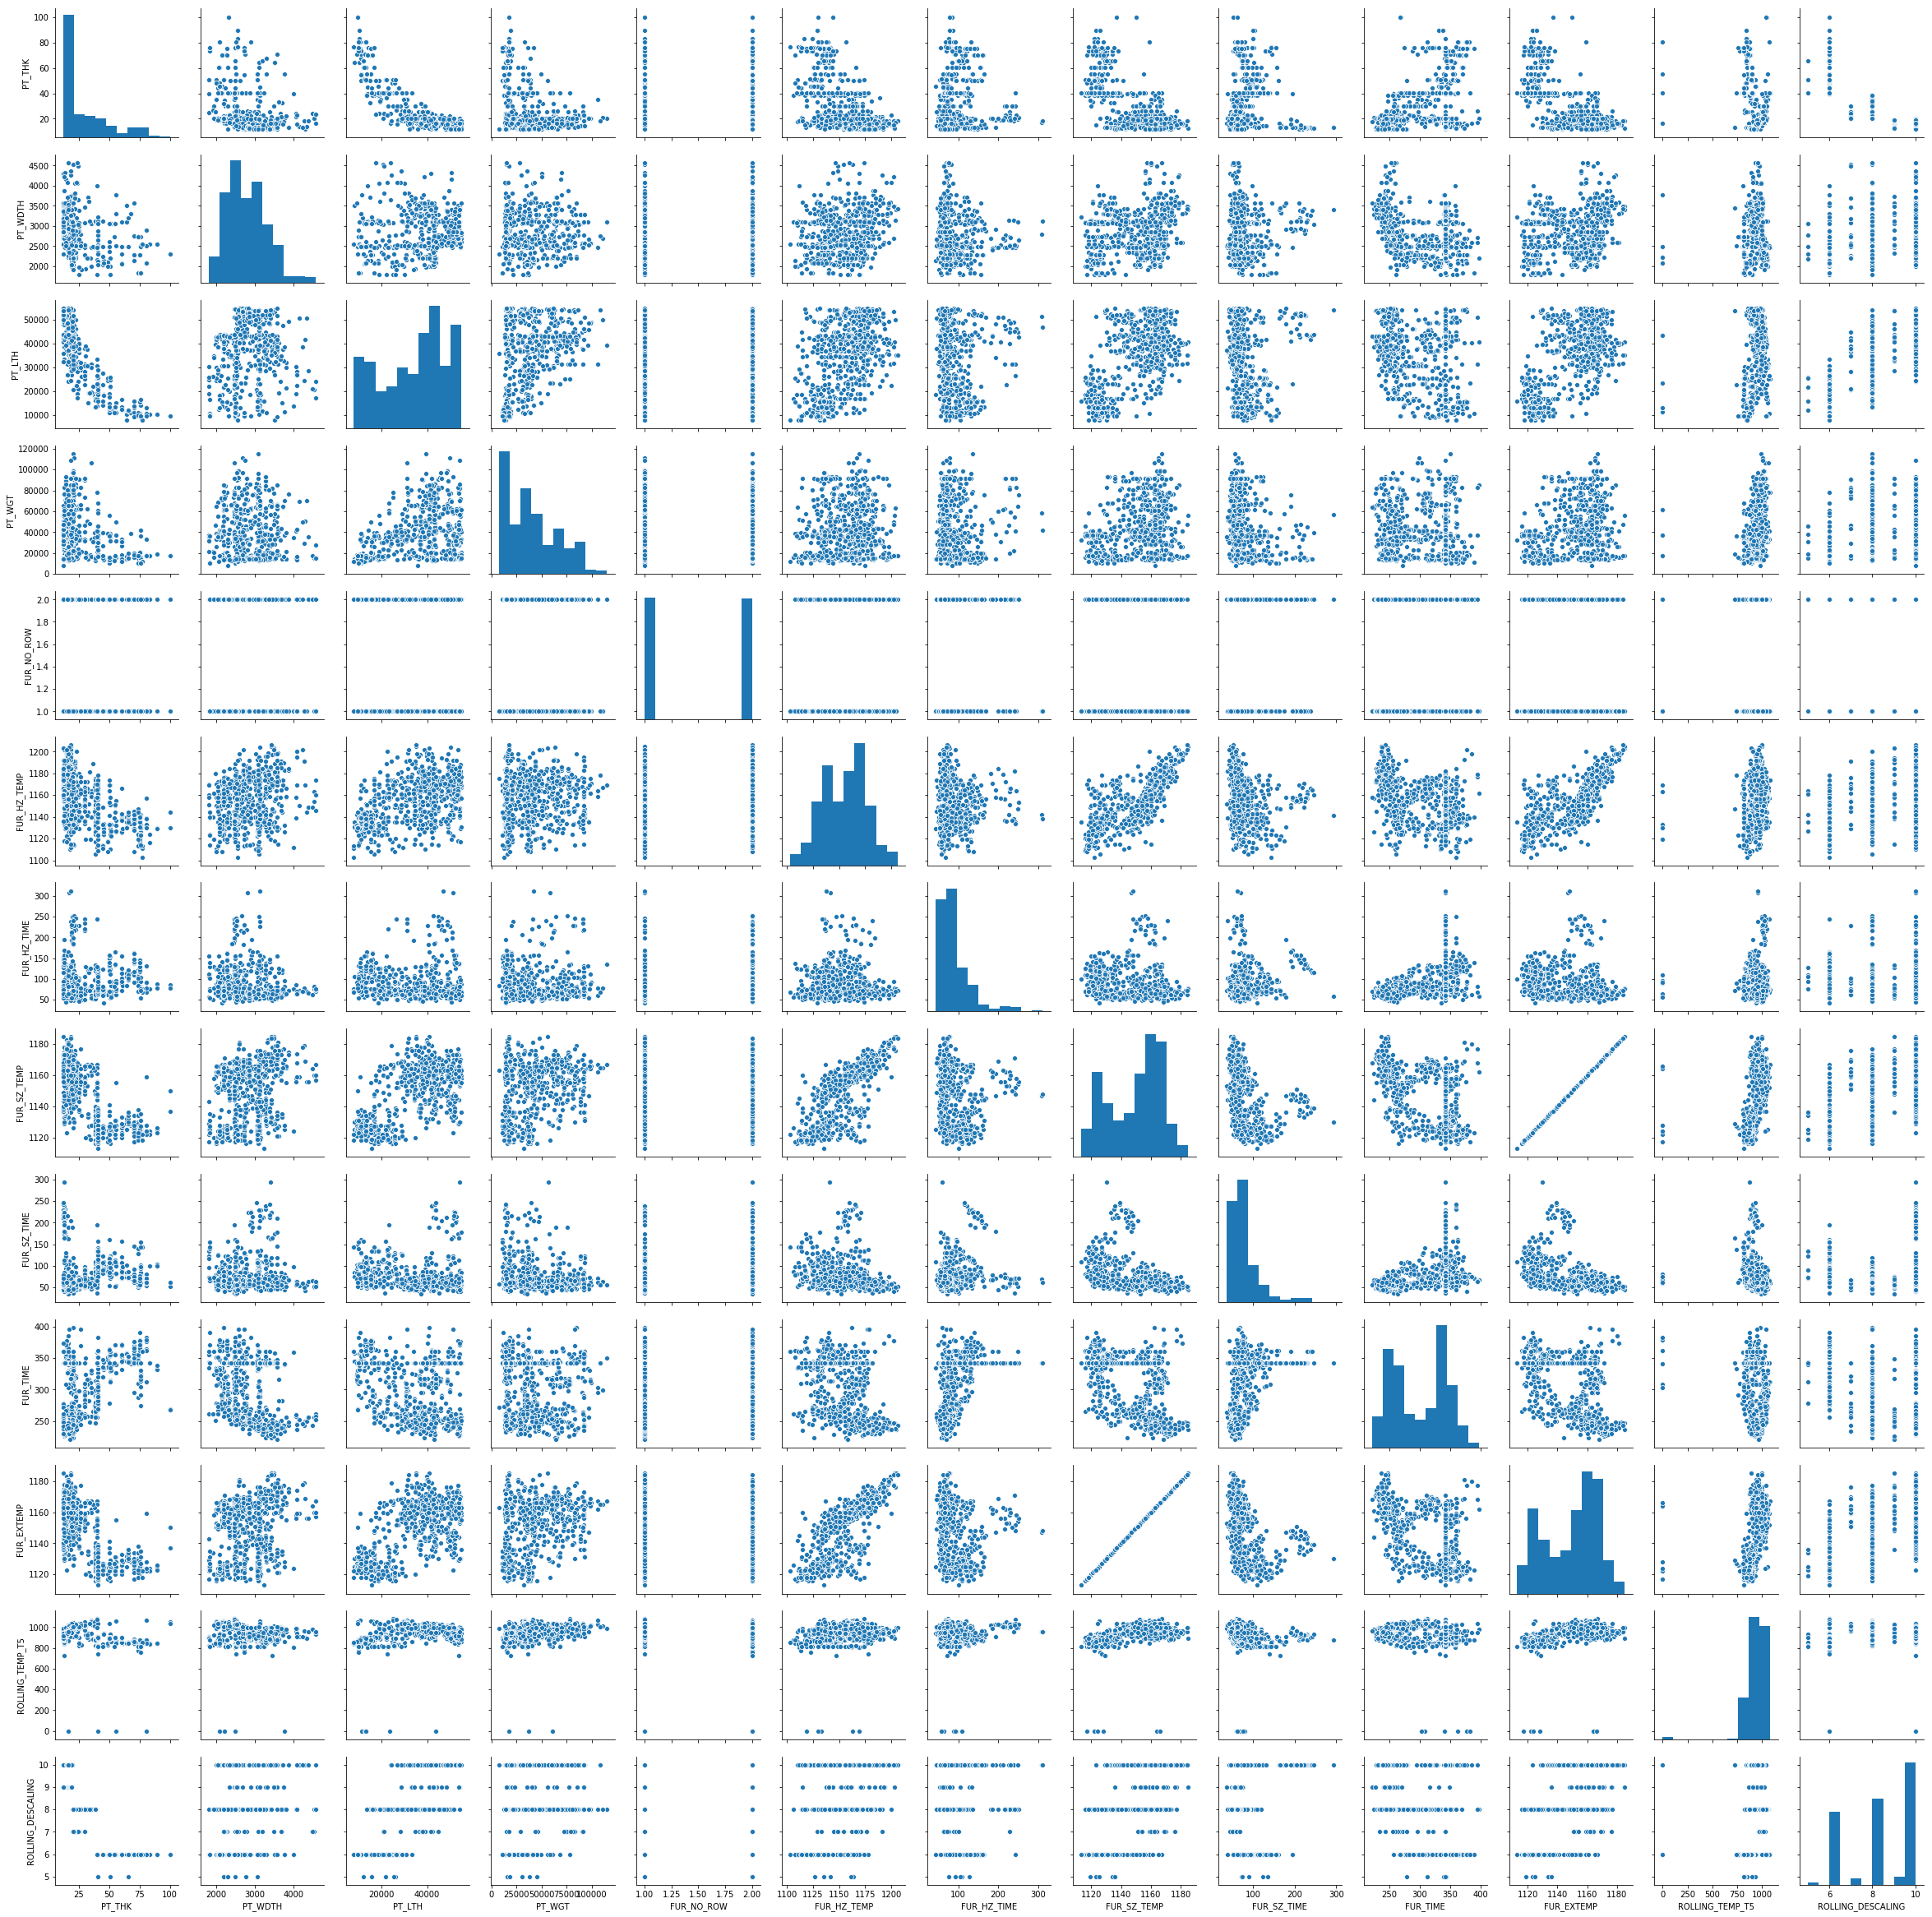

In [76]:
#2.변수 간의 경향성 파악 - 그래프 분석
sns.pairplot(ds_posco)

In [77]:
#2-2 변수 간의 경향성 파악 - 상관관계 분석
#상관관계 분석
ds_posco.corr().round(3)

PT_THK  PT_WDTH  PT_LTH  PT_WGT  FUR_NO_ROW  FUR_HZ_TEMP  \
PT_THK              1.000   -0.313  -0.863  -0.397      -0.003       -0.524   
PT_WDTH            -0.313    1.000   0.120   0.031       0.007        0.180   
PT_LTH             -0.863    0.120   1.000   0.452      -0.021        0.473   
PT_WGT             -0.397    0.031   0.452   1.000      -0.022        0.153   
FUR_NO_ROW         -0.003    0.007  -0.021  -0.022       1.000        0.005   
FUR_HZ_TEMP        -0.524    0.180   0.473   0.153       0.005        1.000   
FUR_HZ_TIME         0.160   -0.119  -0.077   0.010      -0.016       -0.114   
FUR_SZ_TEMP        -0.695    0.227   0.645   0.360       0.009        0.773   
FUR_SZ_TIME         0.113    0.023  -0.070  -0.191       0.049       -0.222   
FUR_TIME            0.413   -0.393  -0.252  -0.058       0.016       -0.348   
FUR_EXTEMP         -0.695    0.227   0.645   0.360       0.009        0.773   
ROLLING_TEMP_T5    -0.374   -0.022   0.313   0.263      -0.004        0.265   
ROLLING_DESCALING  -0.837    0.338   0.809   0.239       0.018        0.471   

                   FUR_HZ_TIME  FUR_SZ_TEMP  FUR_SZ_TIME  FUR_TIME  \
PT_THK                   0.160       -0.695        0.113     0.413   
PT_WDTH                 -0.119        0.227        0.023    -0.393   
PT_LTH                  -0.077        0.645       -0.070    -0.252   
PT_WGT                   0.010        0.360       -0.191    -0.058   
FUR_NO_ROW              -0.016        0.009        0.049     0.016   
FUR_HZ_TEMP             -0.114        0.773       -0.222    -0.348   
FUR_HZ_TIME              1.000       -0.203        0.178     0.473   
FUR_SZ_TEMP             -0.203        1.000       -0.451    -0.477   
FUR_SZ_TIME              0.178       -0.451        1.000     0.443   
FUR_TIME                 0.473       -0.477        0.443     1.000   
FUR_EXTEMP              -0.203        1.000       -0.451    -0.477   
ROLLING_TEMP_T5          0.012        0.452       -0.207    -0.199   
ROLLING_DESCALING       -0.138        0.649       -0.106    -0.367   

                   FUR_EXTEMP  ROLLING_TEMP_T5  ROLLING_DESCALING  
PT_THK                 -0.695           -0.374             -0.837  
PT_WDTH                 0.227           -0.022              0.338  
PT_LTH                  0.645            0.313              0.809  
PT_WGT                  0.360            0.263              0.239  
FUR_NO_ROW              0.009           -0.004              0.018  
FUR_HZ_TEMP             0.773            0.265              0.471  
FUR_HZ_TIME            -0.203            0.012             -0.138  
FUR_SZ_TEMP             1.000            0.452              0.649  
FUR_SZ_TIME            -0.451           -0.207             -0.106  
FUR_TIME               -0.477           -0.199             -0.367  
FUR_EXTEMP              1.000            0.452              0.649  
ROLLING_TEMP_T5         0.452            1.000              0.268  
ROLLING_DESCALING       0.649            0.268              1.000

In [78]:
ds_posco.describe()

PT_THK      PT_WDTH        PT_LTH         PT_WGT  FUR_NO_ROW  \
count  720.000000   720.000000    720.000000     720.000000  720.000000   
mean    29.267857  2807.127778  34323.269444   41481.777778    1.497222   
std     19.152651   517.839690  13828.434837   24751.322015    0.500340   
min     12.030000  1800.000000   7893.000000    7820.000000    1.000000   
25%     16.090000  2466.000000  22663.000000   17757.500000    1.000000   
50%     20.130000  2725.000000  37380.000000   36120.000000    1.000000   
75%     40.000000  3125.000000  43735.000000   61120.000000    2.000000   
max    100.340000  4575.000000  54917.000000  115080.000000    2.000000   

       FUR_HZ_TEMP  FUR_HZ_TIME  FUR_SZ_TEMP  FUR_SZ_TIME    FUR_TIME  \
count   720.000000   720.000000   720.000000   720.000000  720.000000   
mean   1155.338889    88.527778  1149.666667    78.802778  300.563889   
std      20.866398    37.660799    17.571788    36.421004   45.390303   
min    1103.000000    43.000000  1113.000000    35.000000  221.000000   
25%    1139.000000    65.000000  1132.000000    57.750000  257.000000   
50%    1158.000000    75.000000  1155.000000    67.500000  304.000000   
75%    1171.000000   101.000000  1164.000000    86.000000  342.000000   
max    1206.000000   312.000000  1185.000000   294.000000  398.000000   

        FUR_EXTEMP  ROLLING_TEMP_T5  ROLLING_DESCALING  
count   720.000000       720.000000         720.000000  
mean   1149.666667       933.920833           8.319444  
std      17.571788       107.863887           1.623252  
min    1113.000000         0.000000           5.000000  
25%    1132.000000       889.750000           6.000000  
50%    1155.000000       951.000000           8.000000  
75%    1164.000000       994.250000          10.000000  
max    1185.000000      1078.000000          10.000000

In [85]:
#3-1 후진제거법을 이용하여 변수 선택
# RFE(recursive feature elimination) 함수: 입력된 모델을 이용하여 변수중요도가 낮은 순으로 순차적으로 제거
# sklearn 의 선형회귀 모델
model = LinearRegression()
# 전체 변수중 5개의 변수가 남을때까지 변수 제거
rfe = RFE(estimator = model, n_features_to_select = 5).fit(ds_posco_x, ds_posco_y)
#선택된 변수
selected_cols = ds_posco_x.columns[rfe.support_]
#제거된 변수
removed_cols = ds_posco_x.columns[~rfe.support_]
print("selected variables : {}".format(selected_cols))
print("removed variables : {}".format(removed_cols))

ValueError: could not convert string to float: '2조'

In [63]:
#데이터 테이블 생성 -> 값 입력
ds_vif = pd.DataFrame()
#변수 명 입력
ds_vif["variable"] = ds_health_x_const.columns
#variance_inflation_factor 다중공선성 함수, exog: 설명변수 데이터, exog_idx: 변수 인덱스
ds_vif["VIF"] = [variance_inflation_factor(ds_health_x_const.values, i) for i in range(ds_health_x_const.shape[1])]
#VIF 낮은 순 정렬
ds_vif.sort_values("VIF", inplace = True)
ds_vif.round(3)

NameError: name 'ds_health_x_const' is not defined